In [26]:

import math
from scipy import stats
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [111]:
def orthogonalize_polygon(polygon, sigma=5):
    offsets = np.zeros_like(polygon)
    divisor = 2 * (sigma ** 2)
    for p_idx in range(len(polygon)):
        nbs_X = []
        nbs_Y = []
        for i in range(-3, 4):
            if i != 0:
                nb = polygon[(p_idx + i) % len(polygon)]
                nbs_X.append(nb[1])
                nbs_Y.append(nb[0])

        a, b = np.polyfit(np.array(nbs_X), np.array(nbs_Y), 1)
        normal = np.array([a, -1])
        normal /= sum(abs(normal))

        p = polygon[p_idx]
        sum_w = 0
        delta_p = 0

        for nb_i in range(-3, 4):
            if nb_i != 0: 
                q = polygon[(i + nb_i) % len(polygon)]
                if True or sum(abs(q - p)) < 40:

                    dist = np.sqrt(sum((q - p) ** 2))

                    sp = np.dot(q - p, normal)

                    w =  1.0625**(-(sp **2)/divisor) # * 1.0625**(-(dist ** 2)/divisor)
                    delta_p += w * sp
                    sum_w += w
        if sum_w != 0:
            offsets[p_idx] = normal * (delta_p / sum_w) 
    return polygon + offsets * 0.1

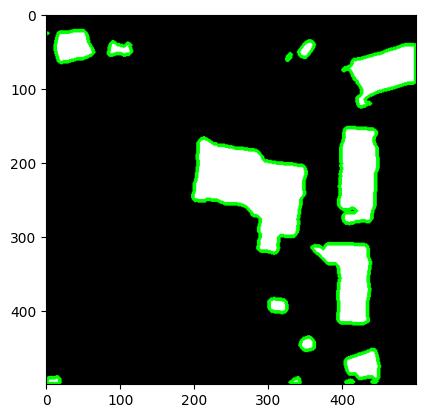

In [4]:
imgs = ["6259_564_1.tif"] 
geometries = []
for img in imgs:
    mask = cv2.imread(f"../datatest/{img}", cv2.IMREAD_GRAYSCALE)
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    geometries.append(contours)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

    mask = cv2.drawContours(mask, contours, -1, (0,255, 0), 3)
    plt.imshow(mask)

C:\Users\LARHOD\AppData\Local\Temp\ipykernel_22036\3463003825.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  points = np.dstack(reversed(build.exterior.xy))


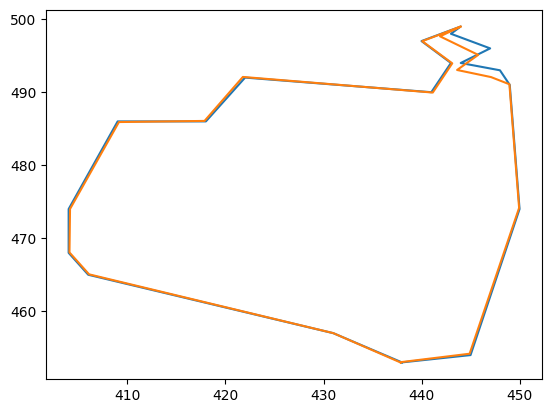

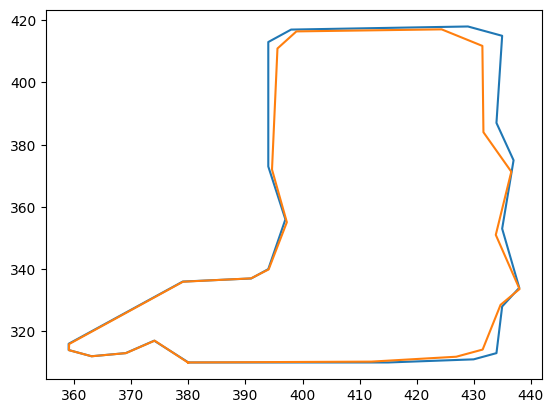

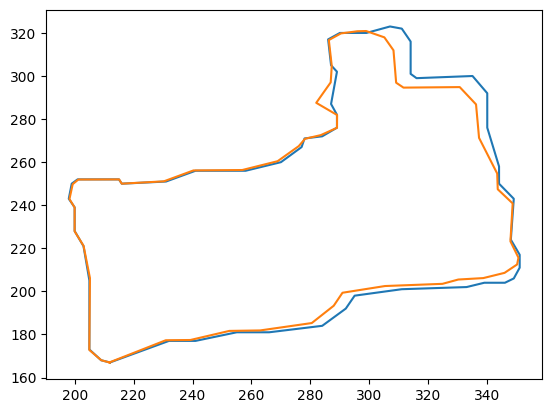

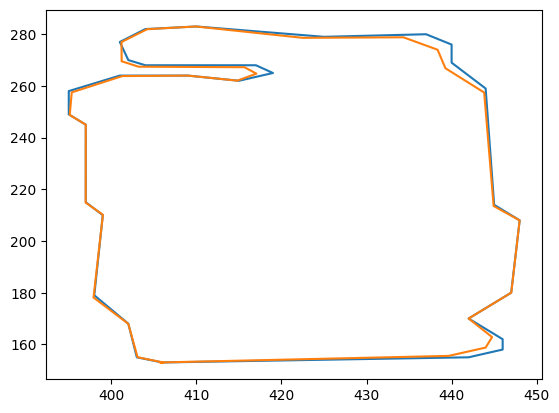

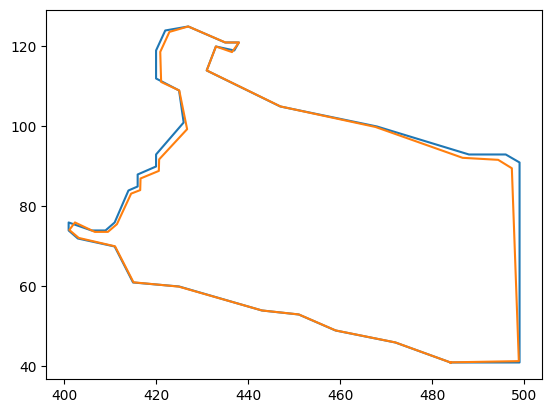

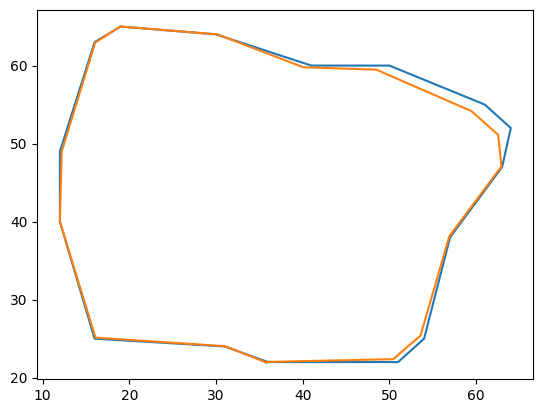

In [112]:
imgs = ["6259_564_1.tif"] 
geometries = []
for img in imgs:
    mask = cv2.imread(f"../datatest/{img}", cv2.IMREAD_GRAYSCALE)
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for build in contours:
        if len(build) > 50:

            build = shapely.geometry.polygon.Polygon(np.squeeze(build))
            build = build.simplify(1.0)
            points = np.dstack(reversed(build.exterior.xy))
            buildOrtho = orthogonalize_polygon(np.squeeze(points), sigma=1)

            xs = build.exterior.xy[0]
            ys = build.exterior.xy[1]
            xs.append(xs[0])
            ys.append(ys[0])

            plt.plot(xs, ys)

            xs = []
            ys = []
            for y, x in buildOrtho:
                xs.append(x)
                ys.append(y)
            xs.append(xs[0])
            ys.append(ys[0])

            plt.plot(xs, ys)
            plt.show()